In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import pathlib
import os
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Reshape, Flatten, Dropout, MaxPooling2D, Conv2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
dataset_dir = pathlib.Path('/Users/admin/Downloads/DSGP/Data Set/Mango')

In [44]:
img_height, img_width = 224,224
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 975 files belonging to 3 classes.
Using 780 files for training.


In [13]:
vali_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10160 files belonging to 3 classes.
Using 2032 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['Banana', 'Mango', 'Papaya']


In [15]:
VGG_model = Sequential()

pretrained_m = keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
for layer in pretrained_m.layers:
    layer.trainable = False
    
VGG_model.add(pretrained_m)
VGG_model.add(BatchNormalization())
VGG_model.add(Flatten())
VGG_model.add(Dense(256, activation='relu'))
VGG_model.add(Dropout(0.2))
VGG_model.add(Dense(3, activation='softmax'))

In [16]:
VGG_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1000)              143667240 
                                                                 
 batch_normalization_1 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 module_wrapper_1 (ModuleWr  (None, 1000)              0         
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 256)               256256    
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 256)               0         
 apper)                                               

In [17]:
VGG_model.compile(optimizer=LegacyAdam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
epochs = 4
history =VGG_model.fit(
    train_ds,
    validation_data = vali_ds,
    epochs=epochs)

Epoch 1/4
254/254 [==============================] - 99s 387ms/step - loss: 0.3182 - accuracy: 0.9412 - val_loss: 0.5545 - val_accuracy: 0.9513
Epoch 2/4
254/254 [==============================] - 128s 504ms/step - loss: 0.3834 - accuracy: 0.9391 - val_loss: 1.2684 - val_accuracy: 0.9518
Epoch 3/4
254/254 [==============================] - 128s 504ms/step - loss: 0.4471 - accuracy: 0.9401 - val_loss: 0.9663 - val_accuracy: 0.9547
Epoch 4/4
254/254 [==============================] - 128s 504ms/step - loss: 0.4416 - accuracy: 0.9418 - val_loss: 0.7740 - val_accuracy: 0.9272


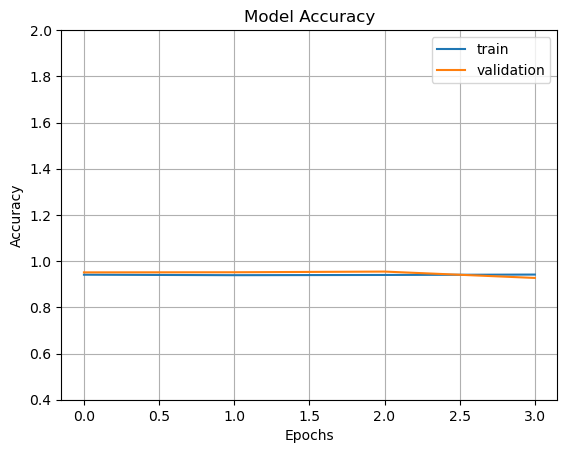

In [38]:
fig = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

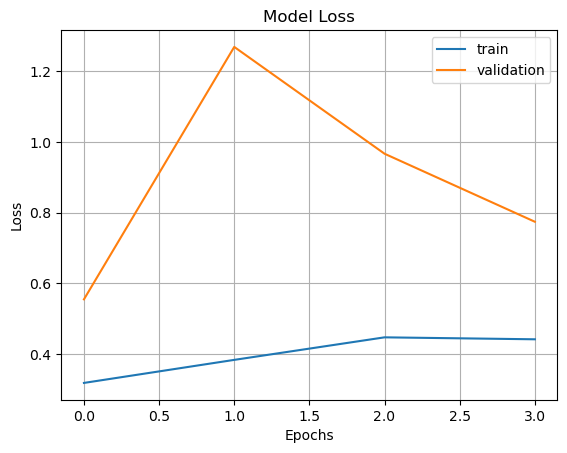

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [40]:
import cv2
image=cv2.imread('/Users/admin/Downloads/57866622bc065f294489ed57_produce_papaya.1.jpg')
image_resized = cv2.resize(image, (img_height, img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [41]:
pred=VGG_model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[9.8906201e-01 1.0937910e-02 2.6751364e-08]]


In [42]:
output_class = class_names[np.argmax(pred)]
print("The fruit is a", output_class)

The fruit is a Banana
